# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP23 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA22issues.json

In [15]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [16]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP23issues.json')]

In [17]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [18]:
# Sanity test: print rows in our DataFrame

issues_df
    

,issue_number,created_at,closed_at,labels,State,Author
0,6,2023-03-23,None,"[Category: Enhancement, OriginationPhase: Requ...",open,SPM587SP23
1,5,2023-03-23,None,"[DetectionPhase: Design, OriginationPhase: Des...",open,SPM587SP23
2,4,2023-03-23,None,"[DetectionPhase: Field, DetectionPhase: Testin...",open,SPM587SP23
3,3,2023-03-05,None,"[documentation, help wanted]",open,SPM587SP23
4,1,2023-03-03,2023-03-23,"[Category: Bug, DetectionPhase: Coding]",closed,SPM587SP23


In [19]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [20]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP23,open,None,2023-03-23,6,"[Category: Enhancement, OriginationPhase: Requ...",NaN,NaN,NaN,NaN,NaN
1,SPM587SP23,open,None,2023-03-23,5,"[DetectionPhase: Design, OriginationPhase: Des...",NaN,NaN,NaN,NaN,NaN
2,SPM587SP23,open,None,2023-03-23,4,"[DetectionPhase: Field, DetectionPhase: Testin...",NaN,NaN,NaN,NaN,NaN
3,SPM587SP23,open,None,2023-03-05,3,"[documentation, help wanted]",NaN,NaN,NaN,NaN,NaN
4,SPM587SP23,closed,2023-03-23,2023-03-03,1,"[Category: Bug, DetectionPhase: Coding]",NaN,NaN,NaN,NaN,NaN


In [21]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [22]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP23,open,None,2023-03-23,6,"[Category: Enhancement, OriginationPhase: Requ...",Requirements,NaN,Enhancement,Critical,NaN
1,SPM587SP23,open,None,2023-03-23,5,"[DetectionPhase: Design, OriginationPhase: Des...",Design,Design,NaN,Critical,pendingReview
2,SPM587SP23,open,None,2023-03-23,4,"[DetectionPhase: Field, DetectionPhase: Testin...",Testing,Testing,NaN,Critical,NaN
3,SPM587SP23,open,None,2023-03-05,3,"[documentation, help wanted]",NaN,NaN,NaN,NaN,NaN
4,SPM587SP23,closed,2023-03-23,2023-03-03,1,"[Category: Bug, DetectionPhase: Coding]",NaN,Coding,Bug,NaN,NaN


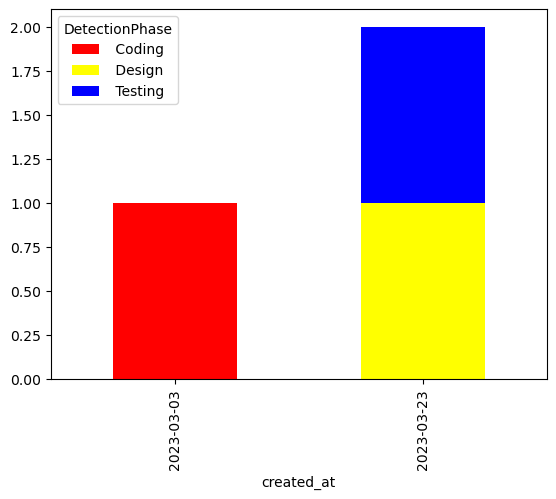

In [23]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

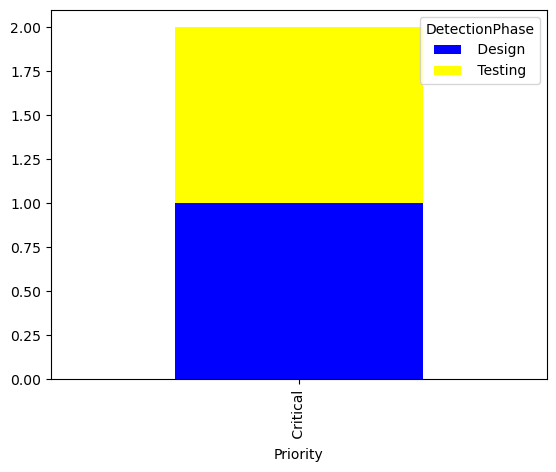

In [24]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

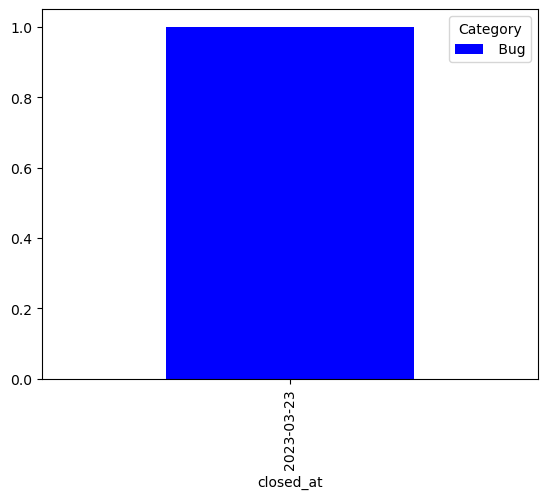

In [25]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

In [26]:
# Requirement #1: Add your code here



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

In [27]:
# Requirement #2: Add your code here

